In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
df.shape

(200, 4)

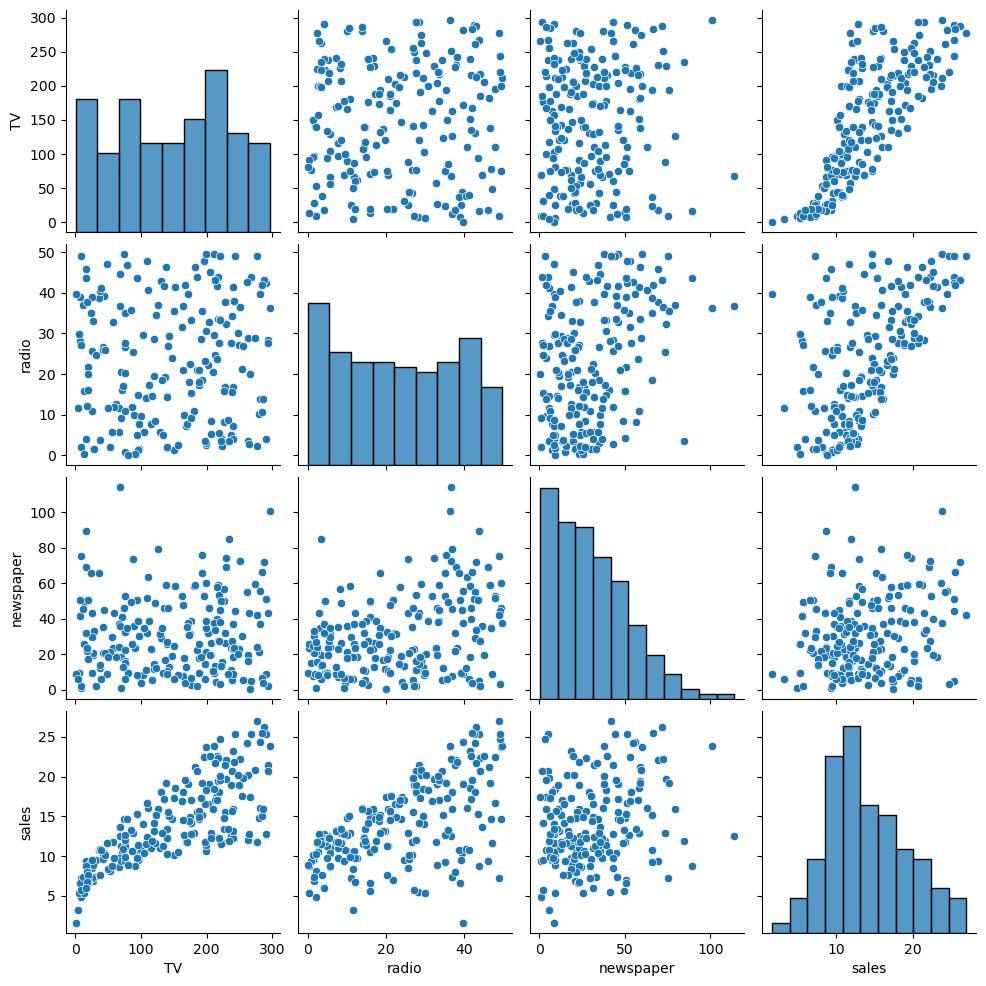

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
X = df.drop('sales',axis=1)
y = df['sales']

In [26]:
#train test split
from sklearn.model_selection import train_test_split

In [27]:
#help(train_test_split)

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)

In [29]:
len(X_train)

140

In [30]:
len(X_test)

60

# Create a Model

### Import relevant model class 

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
#help(LinearRegression)

In [33]:
#Create an instance of the Linear Regression Model
mod = LinearRegression()

In [34]:
#Fit/Train the Model on the Training Dataset

mod.fit(X_train,y_train)

LinearRegression()

### MAE: easiest to understand, because its avg error
### MSE: 'punishes' larger error which tends to useful in real world where there are outliers
### RMSE: most popular, iterpretable in the 'y' units

## All these are loss functions, because we want to minimise them

In [35]:
#Calculate Y predictions

y_pred = mod.predict(X_test)

In [36]:
y_pred

array([13.86471261, 15.0090562 , 10.60511722, 10.09061905, 10.2058302 ,
       18.44112845, 15.35623109,  3.50456716, 20.57163267, 11.98288476,
       15.08601123, 12.84835102, 21.13029782, 14.37916353, 15.96630443,
       16.97004665, 10.28916068, 16.78706185,  9.5680503 , 12.51794578,
       16.90028224, 10.16656637,  8.06620555, 13.98212973, 21.32738303,
       14.23529429,  7.20839801,  7.55987252, 15.4385442 , 13.60561012,
       14.89945663, 10.22068212, 11.980595  , 16.40933006,  6.58023303,
        9.63142726, 12.99984158, 20.51038927,  9.15336417, 11.31226434,
        7.30108894, 24.61494601,  9.80946097, 18.27320104, 16.57103149,
       12.0584219 , 12.43507395, 16.11514576,  8.76566004,  7.84595288,
       12.21810153, 12.07628047, 14.37606032, 10.49776835, 17.58332133,
       16.68505237, 16.43189148,  3.56597841, 23.2024176 , 13.2715782 ])

In [37]:
y_test

112    14.1
165    11.9
12      9.2
73     11.0
144    11.4
20     18.0
199    13.4
8       4.8
39     21.5
88     12.9
81     12.3
197    12.8
69     22.3
160    14.4
25     12.0
99     17.2
151    11.6
23     15.5
138     9.6
159    12.9
89     16.7
82     11.3
24      9.7
174    11.5
137    20.8
83     13.6
107     8.7
34      9.5
97     15.5
167    12.2
123    15.2
157    10.1
75      8.7
152    16.6
117     9.4
149    10.1
63     14.0
54     20.2
125    10.6
80     11.8
170     8.4
183    26.2
38     10.1
153    19.0
40     16.6
190    10.8
177    11.7
131    12.7
13      9.7
121     7.0
1      10.4
116    12.2
100    11.7
166     8.0
168    17.1
48     14.8
178    11.8
108     5.3
61     24.2
16     12.5
Name: sales, dtype: float64

In [38]:
df['sales'].mean()

14.0225

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [41]:
MAE  #test label

1.2349919247199046

<Axes: xlabel='sales', ylabel='Count'>

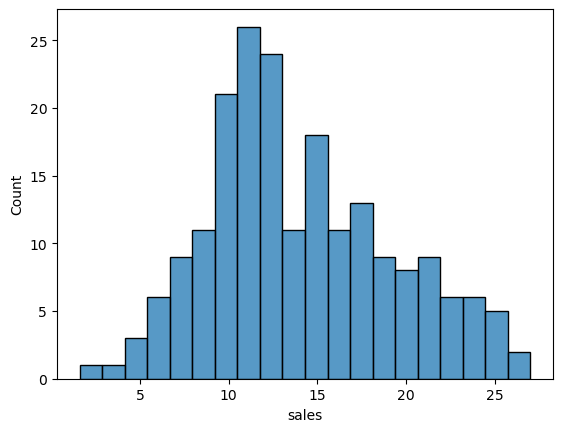

In [42]:
sns.histplot(data=df,x='sales', bins=20)

In [43]:
1.23/14

0.08785714285714286

In [44]:
MSE #y squared unit

2.6227729007513996

In [45]:
RMSE

1.6194977310115009

In [46]:
#std dev of your predictions and MSE could be thought of as the variance for your predictions

#good MAE bt very bad RMSE means model is good on most points bt for few points, it is way off 

# Plotting Residuals 

In [47]:
y_res = y_test-y_pred
y_res

112    0.235287
165   -3.109056
12    -1.405117
73     0.909381
144    1.194170
20    -0.441128
199   -1.956231
8      1.295433
39     0.928367
88     0.917115
81    -2.786011
197   -0.048351
69     1.169702
160    0.020836
25    -3.966304
99     0.229953
151    1.310839
23    -1.287062
138    0.031950
159    0.382054
89    -0.200282
82     1.133434
24     1.633794
174   -2.482130
137   -0.527383
83    -0.635294
107    1.491602
34     1.940127
97     0.061456
167   -1.405610
123    0.300543
157   -0.120682
75    -3.280595
152    0.190670
117    2.819767
149    0.468573
63     1.000158
54    -0.310389
125    1.446636
80     0.487736
170    1.098911
183    1.585054
38     0.290539
153    0.726799
40     0.028969
190   -1.258422
177   -0.735074
131   -3.415146
13     0.934340
121   -0.845953
1     -1.818102
116    0.123720
100   -2.676060
166   -2.497768
168   -0.483321
48    -1.885052
178   -4.631891
108    1.734022
61     0.997582
16    -0.771578
Name: sales, dtype: float64

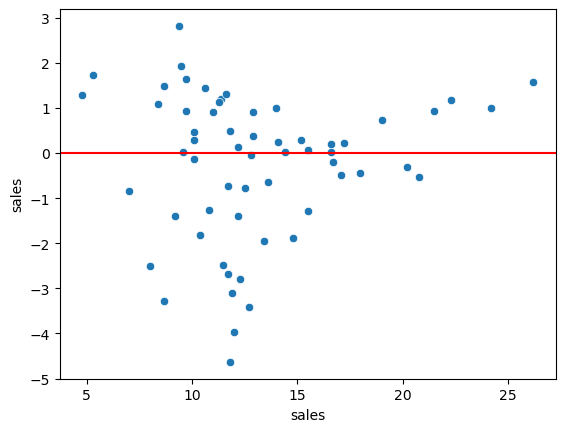

In [48]:
sns.scatterplot(x=y_test,y=y_res)
plt.axhline(y= 0, color = 'red')

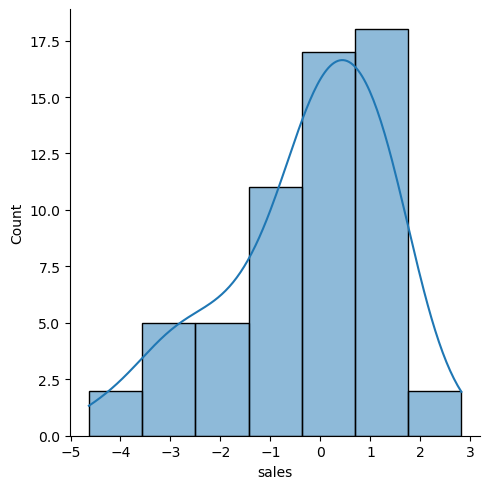

In [49]:
sns.displot(y_res, kde=True)

In [50]:
#Retraining Model on Full Data
final_mod = LinearRegression()


In [51]:
final_mod.fit(X,y)

LinearRegression()

In [52]:
y_pred_final = final_mod.predict(X)

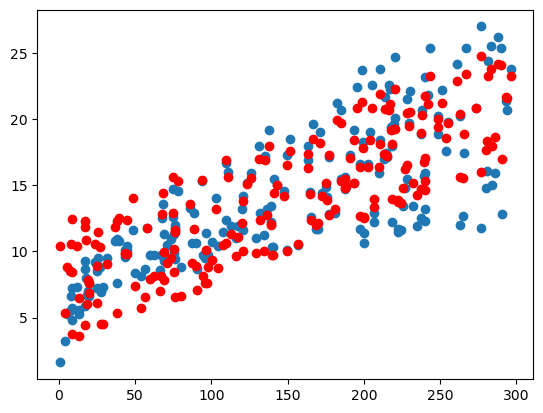

In [53]:
plt.scatter(df['TV'],df['sales'])
plt.scatter(df['TV'],y_pred_final, color = 'red')

In [55]:
#Residuals
y_res_final = y_pred_final-y

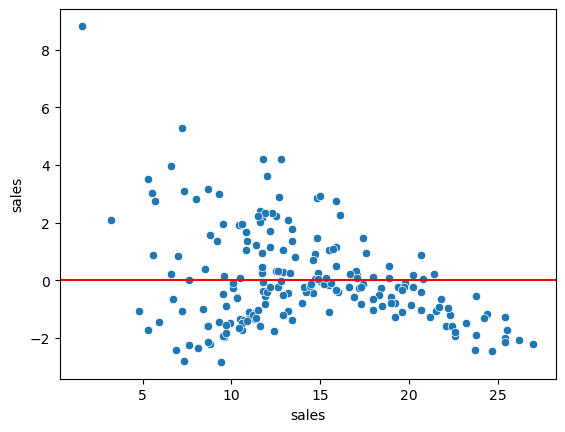

In [57]:
sns.scatterplot(x=y,y=y_res_final)
plt.axhline(y= 0, color = 'red')

# Coefficients

In [59]:
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [58]:
final_mod.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [60]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [67]:
new_values = [[200,5,100],[200,5,1000]]

In [68]:
final_mod.predict(new_values)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.93071924, 11.9969755 ])